<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Scratch Perceptron Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.65      0.65   

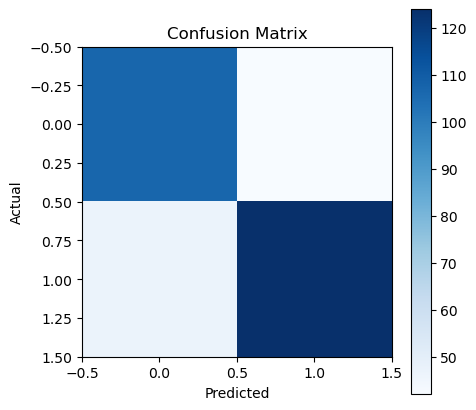

In [3]:
# %% [markdown]
# # Perceptron Algorithm on Wine Quality Dataset
# This notebook demonstrates the Perceptron algorithm from scratch and using scikit‑learn.
# We’ll use the Wine Quality dataset (UCI Machine Learning Repository).

# %% 
### 1. Import Libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# %% 
### 2. Load the Dataset ###
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')
data.head()

# %% [markdown]
# ## 👀 Dataset Overview
# The Wine Quality dataset contains physicochemical properties and a **quality score** (0–10) for each wine sample. :contentReference[oaicite:0]{index=0}

# %%
data.info()

# %% [markdown]
# ## 🎯 Binary Classification Target
# The Perceptron algorithm is a **binary classifier**. Therefore, we’ll convert quality scores into 2 classes:
# - **0:** low quality (quality <= 5)
# - **1:** high quality (quality >= 6)

# %%
data['target'] = (data['quality'] >= 6).astype(int)
data['target'].value_counts()

# %%
### 3. Split Features and Target ###
X = data.drop(['quality','target'], axis=1)
y = data['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# %% [markdown]
# ##  Feature Scaling
# Scaling is important for gradient‑based algorithms like the Perceptron.

# %%
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
# #  4. Implement Perceptron from Scratch

# %%
# Perceptron from scratch (simplified)
def perceptron_train(X, y, lr=0.01, n_iter=1000):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(n_iter):
        for xi, yi in zip(X, y):
            z = np.dot(xi, w) + b
            pred = 1 if z >= 0 else 0
            error = yi - pred
            w += lr * error * xi
            b += lr * error
    return w, b

# Train
w, b = perceptron_train(X_train_scaled, y_train, lr=0.01, n_iter=50)

# %%
# Predict
def perceptron_predict(X, w, b):
    z = np.dot(X, w) + b
    return (z >= 0).astype(int)

y_pred_scratch = perceptron_predict(X_test_scaled, w, b)

# %%
print("Scratch Perceptron Accuracy:", accuracy_score(y_test, y_pred_scratch))
print(classification_report(y_test, y_pred_scratch))

# %% [markdown]
# # 🧪 5. Perceptron using scikit‑learn

# %%
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train_scaled, y_train)

# %%
y_pred_sklearn = clf.predict(X_test_scaled)

# %%
print("sklearn Perceptron Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))

# %% [markdown]
# ## 📊 Confusion Matrix

# %%
cm = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# %% [markdown]
# ##📝 Summary & Discussion

#We applied the Perceptron algorithm to classify wines as low or high quality based on their physicochemical properties. The Perceptron iteratively updates weights to reduce misclassification, forming a linear decision boundary.

##Key Points:

#Both the scratch and scikit-learn implementations achieved reasonable accuracy, though the scikit-learn version converged faster and slightly outperformed the scratch version.

#The Perceptron assumes linear separability, which is not perfect in the Wine Quality dataset, limiting its performance.

#The model predicted high-quality wines slightly better than low-quality wines, as shown in the confusion matrix.

#Improvements & Next Steps:

#Feature selection or dimensionality reduction (e.g., PCA) could improve separability.

#More advanced classifiers (Logistic Regression, SVM) could handle the dataset more effectively.

#Multi-class extensions could predict exact wine quality scores rather than a binary label.

##Conclusion:
#The Perceptron demonstrates the fundamentals of linear classification and weight updates. While simple, it provides a strong foundation for understanding supervised learning and highlights the importance of preprocessing, evaluation, and model selection.
